In [139]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, classification_report, 
                             confusion_matrix, roc_curve)

In [5]:
# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Step 1: Load the Data

In [7]:
client_df = pd.read_csv('Documents/Final Year Engineering/BCG/client_data (1).csv')
price_df = pd.read_csv('Documents/Final Year Engineering/BCG/price_data (1).csv')

print("Client Data Shape:", client_df.shape)
print("Price Data Shape:", price_df.shape)

Client Data Shape: (14606, 26)
Price Data Shape: (193002, 8)


# Step 2: Merge Datasets on 'id'

In [9]:
# We'll use the latest price info per customer
latest_price_df = price_df.sort_values('price_date').drop_duplicates('id', keep='last')
df = client_df.merge(latest_price_df, on='id', how='left')

print("Merged Dataset Shape:", latest_price_df.shape)

Merged Dataset Shape: (16096, 8)


In [10]:
print("Look into the dataset:")
latest_price_df.head()

Look into the dataset:


,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
172717,580d096fd515ab9501188e492c47810d,2015-10-01,0.166638,0.087890,0.00000,44.44471,0.000000,0.000000
169252,591826b48e75c693e0317506ee18655b,2015-11-01,0.148586,0.000000,0.00000,44.44471,0.000000,0.000000
180163,b583694e70d59d7cfe5873869111a649,2015-12-01,0.143946,0.000000,0.00000,44.26693,0.000000,0.000000
191549,f450ea1f5e55a0edb889a072d5c70c3e,2015-12-01,0.103461,0.093571,0.07059,58.93678,36.344721,8.334263
178652,1c65d82e5ac151a43656de3fc026fc8e,2015-12-01,0.146788,0.000000,0.00000,44.44471,0.000000,0.000000


# Step 3: Data Cleaning

In [12]:
# Convert date columns to datetime
date_cols = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
for price_date in date_cols:
    df[price_date] = pd.to_datetime(df[price_date], errors='coerce')

print(latest_price_df.price_date)

172717    2015-10-01
169252    2015-11-01
180163    2015-12-01
191549    2015-12-01
178652    2015-12-01
             ...    
118676    2015-12-01
118664    2015-12-01
118652    2015-12-01
118796    2015-12-01
193001    2015-12-01
Name: price_date, Length: 16096, dtype: object


In [13]:
# Convert boolean/binary
df['has_gas'] = df['has_gas'].astype(bool)
df['churn'] = df['churn'].astype(bool)

In [14]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
price_date                        0
price_off_

# Step 4: Univariate Analysis

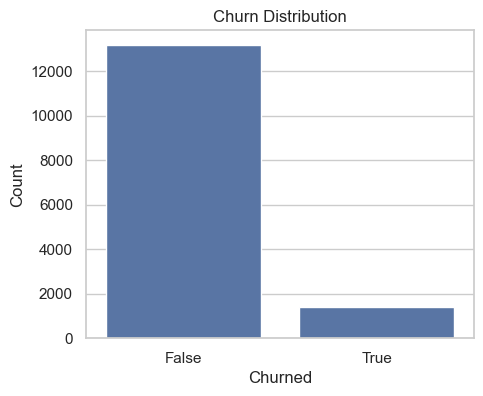

In [16]:
# Churn Distribution
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='churn')
plt.title("Churn Distribution")
plt.xlabel("Churned")
plt.ylabel("Count")
plt.show()

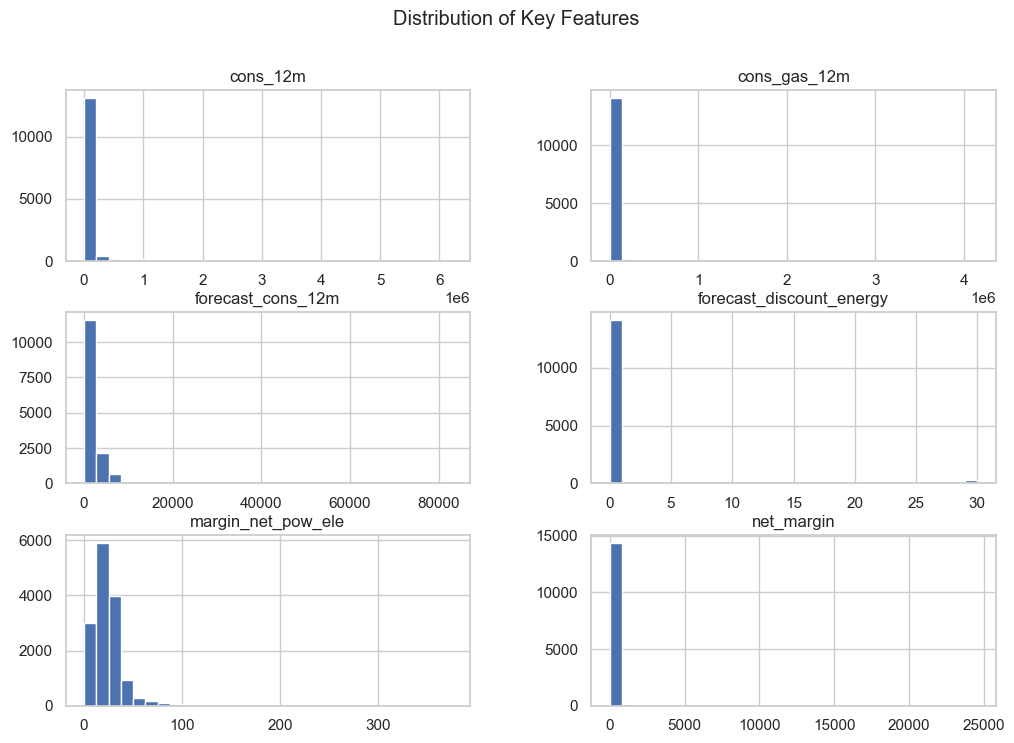

In [17]:
# Distribution of key numeric features
numeric_cols = ['cons_12m', 'cons_gas_12m', 'forecast_cons_12m', 
                'forecast_discount_energy', 'margin_net_pow_ele', 'net_margin']
df[numeric_cols].hist(bins=30, figsize=(12, 8))
plt.suptitle("Distribution of Key Features")
plt.show()

# Step 5: Bivariate Analysis

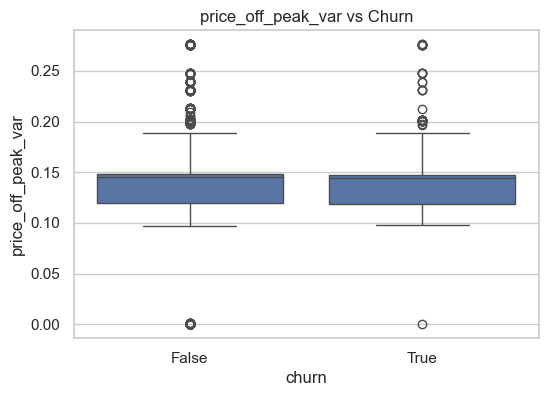

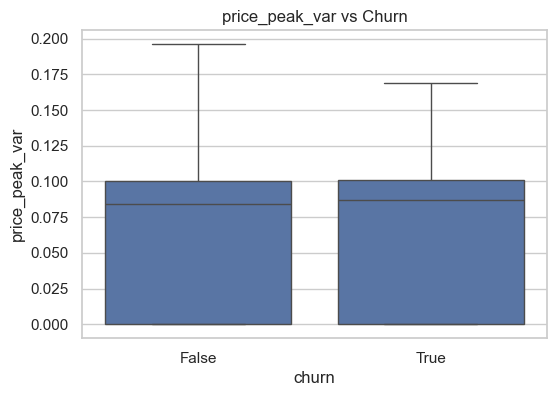

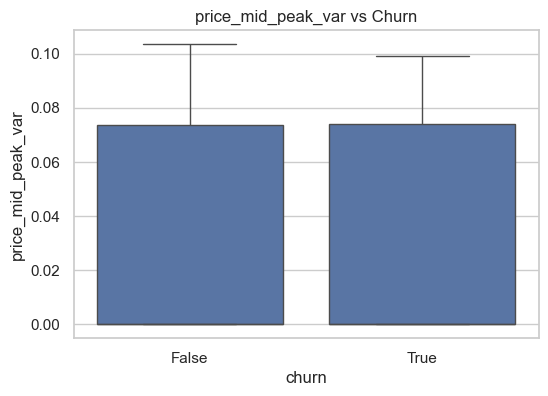

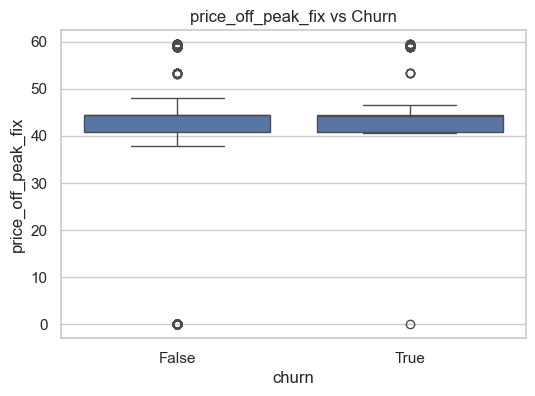

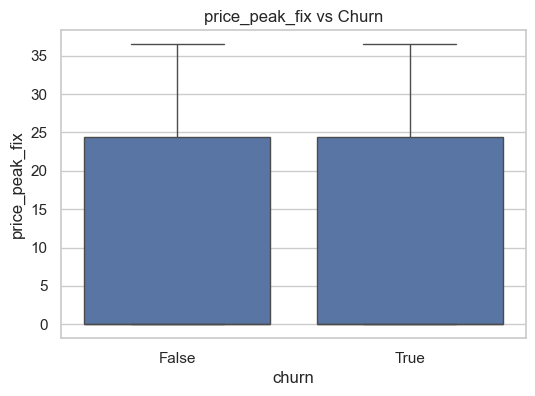

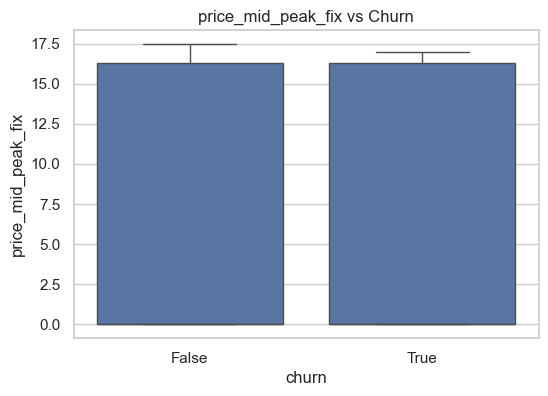

In [19]:
# Price vs Churn
price_cols = ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
              'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']

for col in price_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='churn', y=col)
    plt.title(f'{col} vs Churn')
    plt.show()

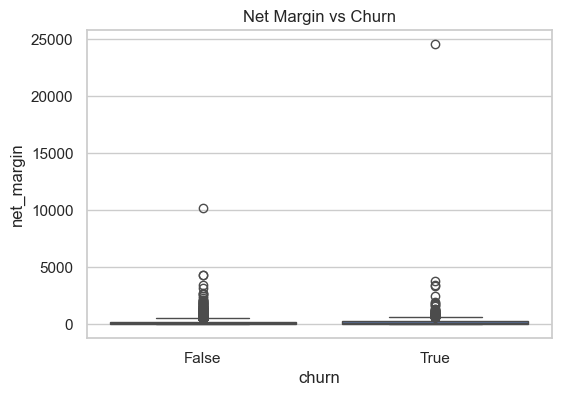

In [20]:
# Margin vs Churn
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='churn', y='net_margin')
plt.title("Net Margin vs Churn")
plt.show()

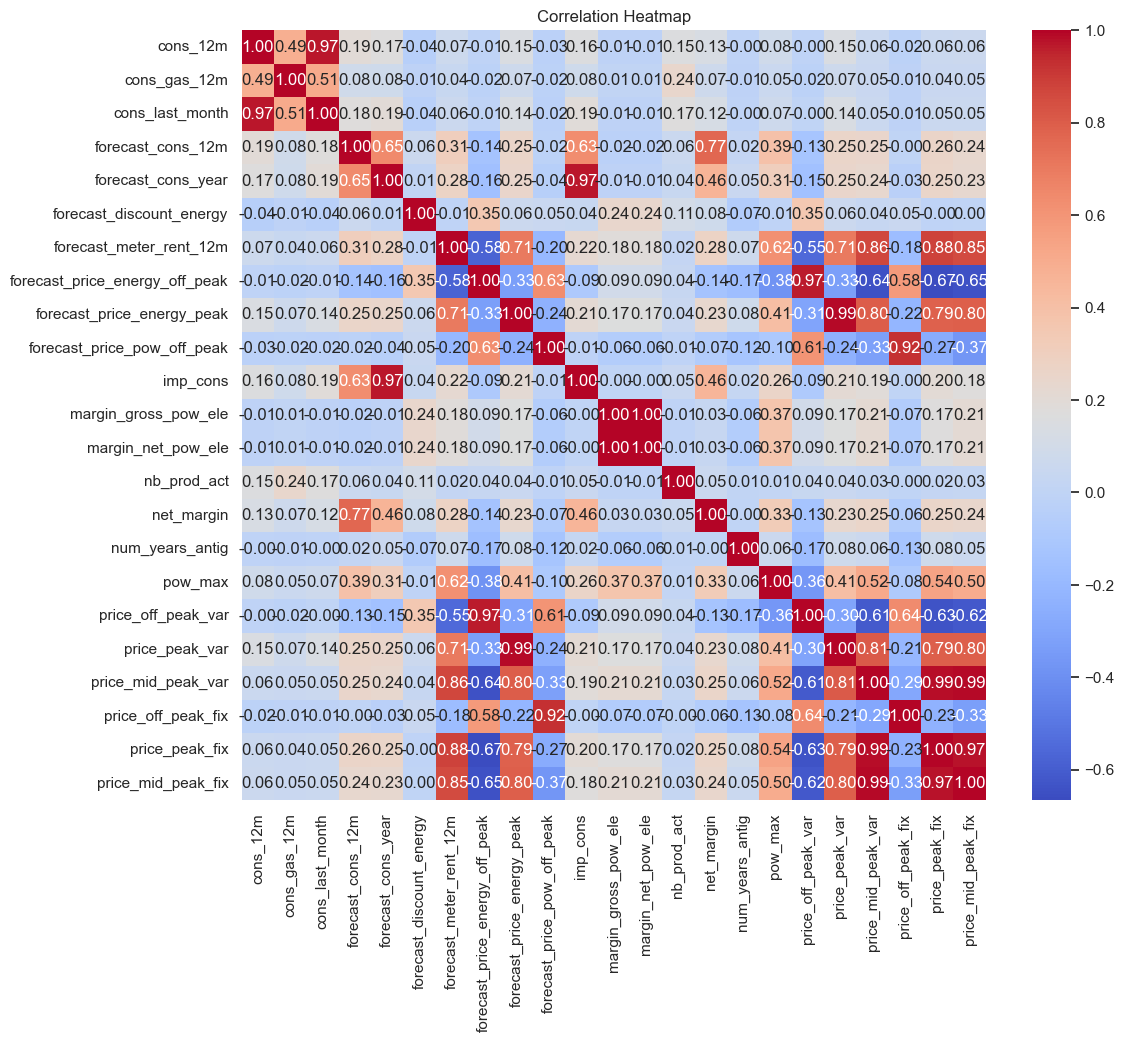

In [21]:
# Correlation Heatmap
corr = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Step 6: Feature Engineering

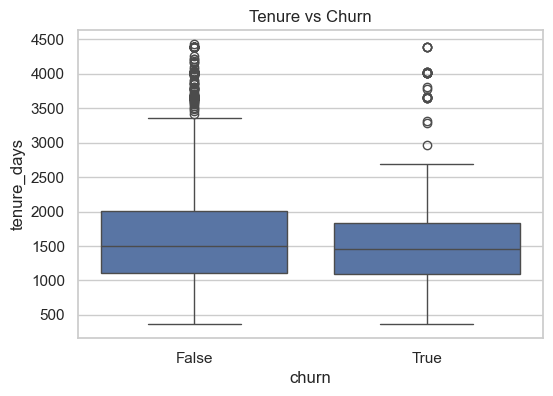

In [23]:
df['tenure_days'] = (df['date_renewal'] - df['date_activ']).dt.days
df['forecast_error'] = df['forecast_cons_12m'] - df['cons_12m']
df['price_spread'] = df['price_peak_var'] - df['price_off_peak_var']

# Tenure vs Churn
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='churn', y='tenure_days')
plt.title("Tenure vs Churn")
plt.show()

# Step 7: Categorical Feature Impact

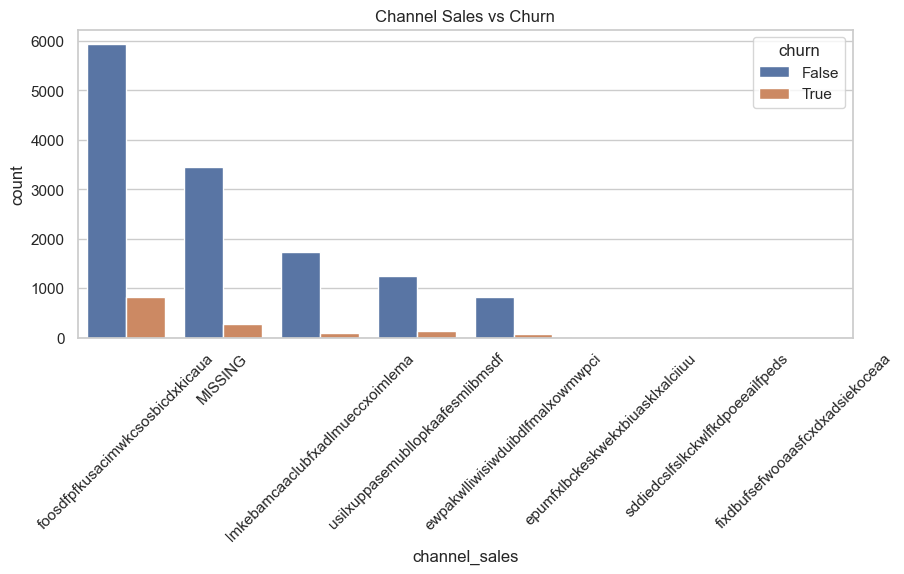

In [25]:
# Channel Sales vs Churn
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='channel_sales', hue='churn')
plt.title("Channel Sales vs Churn")
plt.xticks(rotation=45)
plt.show()

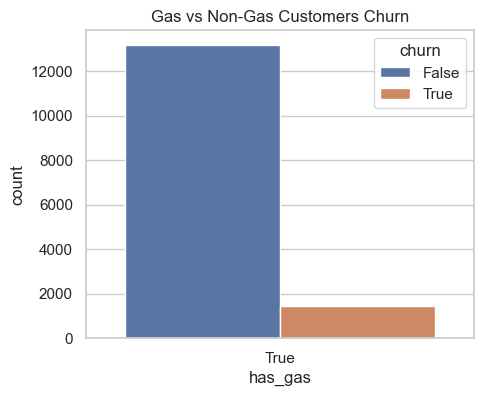

In [26]:
# Gas Customers vs Churn
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='has_gas', hue='churn')
plt.title("Gas vs Non-Gas Customers Churn")
plt.show()

# Step 8: Save Cleaned Data (Optional)

In [28]:
df.to_csv("Documents/Final Year Engineering/BCG/cleaned_merged_data.csv", index=False)
print("Cleaned dataset saved as cleaned_merged_data.csv")

Cleaned dataset saved as cleaned_merged_data.csv


# Step 9 : Feature Engineering

### Step 9.1: Drop unhelpful columns

In [112]:
clean_df = pd.read_csv('Documents/Final Year Engineering/BCG/cleaned_merged_data.csv')
clean_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,tenure_days,forecast_error,price_spread
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,True,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,True,2015-12-01,0.146033,0.085483,0.000000,44.266930,0.00000,0.000000,738,0.00,-0.060550
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,True,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,False,2015-12-01,0.147600,0.000000,0.000000,44.444710,0.00000,0.000000,2201,-4470.05,-0.147600
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,True,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,False,2015-12-01,0.167798,0.088409,0.000000,44.444710,0.00000,0.000000,1827,-496.04,-0.079389
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,True,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,False,2015-12-01,0.148586,0.000000,0.000000,44.444710,0.00000,0.000000,1827,-1343.96,-0.148586
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,True,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,False,2015-12-01,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,1881,-3979.25,-0.018233


In [114]:
clean_df = clean_df.drop(columns=['id'])

# Drop columns with only one unique value
for col in clean_df.columns:
    if clean_df[col].nunique() == 1:
        clean_df.drop(col, axis=1, inplace=True)

### Step 9.2: Extract temporal features

In [120]:
# Convert date columns to datetime format
date_cols = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
for col in date_cols:
    clean_df[col] = pd.to_datetime(clean_df[col], errors='coerce')

# Time differences
clean_df['days_to_renewal'] = (clean_df['date_renewal'] - clean_df['date_modif_prod']).dt.days
clean_df['contract_duration_days'] = (clean_df['date_end'] - clean_df['date_activ']).dt.days
clean_df['product_modified_days_ago'] = (clean_df['date_renewal'] - clean_df['date_modif_prod']).dt.days

# Extracting components
clean_df['activation_year'] = clean_df['date_activ'].dt.year
clean_df['activation_month'] = clean_df['date_activ'].dt.month
clean_df['modif_month'] = clean_df['date_modif_prod'].dt.month
clean_df['renewal_month'] = clean_df['date_renewal'].dt.month

# Drop raw datetime columns if you won't use them directly
clean_df.drop(columns=['date_activ', 'date_end', 'date_modif_prod', 'date_renewal'], inplace=True)

### Step 9.3: New interaction features

In [125]:
# Forecast vs actual consumption
clean_df['forecast_error_12m'] = clean_df['forecast_cons_12m'] - clean_df['cons_12m']
clean_df['forecast_error_ratio'] = clean_df['forecast_error_12m'] / (clean_df['cons_12m'] + 1e-6)

# Price spread
clean_df['var_price_spread'] = clean_df['price_peak_var'] - clean_df['price_off_peak_var']
clean_df['fix_price_spread'] = clean_df['price_peak_fix'] - clean_df['price_off_peak_fix']

# Power cost per unit
clean_df['cost_per_kwh'] = clean_df['margin_net_pow_ele'] / (clean_df['cons_12m'] + 1e-6)

# Net margin per active product
clean_df['net_margin_per_product'] = clean_df['net_margin'] / (clean_df['nb_prod_act'] + 1e-6)

### Step 9.4: Encode categorical features

In [130]:
cat_cols = ['channel_sales', 'origin_up']
le = LabelEncoder()
for col in cat_cols:
    clean_df[col] = le.fit_transform(clean_df[col].astype(str))

### Step 9.5: Final cleanup

In [133]:
clean_df.fillna(0, inplace=True)

In [144]:
# Save to a new file
clean_df.to_csv("Documents/Final Year Engineering/BCG/final_featured_data.csv", index=False)
print("Feature-engineered dataset saved as final_featured_data.csv")

Feature-engineered dataset saved as final_featured_data.csv


# Step 10: Modelling and Evaluation

### Step 10.1: Prepare Features and Target

In [146]:
fe_df = pd.read_csv('Documents/Final Year Engineering/BCG/final_featured_data.csv')

fe_df.head()

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,tenure_days,forecast_error,price_spread,days_to_renewal,contract_duration_days,product_modified_days_ago,activation_year,activation_month,modif_month,renewal_month,forecast_error_12m,forecast_error_ratio,var_price_spread,fix_price_spread,cost_per_kwh,net_margin_per_product
0,4,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,0.00,25.44,25.44,2,678.99,3,4,43.648,True,2015-12-01,0.146033,0.085483,0.000000,44.266930,0.00000,0.000000,738,0.00,-0.060550,-131,1096,-131,2013,6,11,6,0.00,0.000000,-0.060550,-44.266930,2.544000e+07,339.494830
1,0,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0.00,16.38,16.38,1,18.89,6,2,13.800,False,2015-12-01,0.147600,0.000000,0.000000,44.444710,0.00000,0.000000,2201,-4470.05,-0.147600,2201,2566,2201,2009,8,8,8,-4470.05,-0.959238,-0.147600,-44.444710,3.515021e-03,18.889981
2,4,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0.00,28.60,28.60,1,6.60,6,2,13.856,False,2015-12-01,0.167798,0.088409,0.000000,44.444710,0.00000,0.000000,1827,-496.04,-0.079389,1827,2192,1827,2010,4,4,4,-496.04,-0.911838,-0.079389,-44.444710,5.257353e-02,6.599993
3,5,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0.00,30.22,30.22,1,25.46,6,2,13.200,False,2015-12-01,0.148586,0.000000,0.000000,44.444710,0.00000,0.000000,1827,-1343.96,-0.148586,1827,2192,1827,2010,3,3,3,-1343.96,-0.848460,-0.148586,-44.444710,1.907828e-02,25.459975
4,0,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,52.32,44.91,44.91,1,47.98,6,2,19.800,False,2015-12-01,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,1881,-3979.25,-0.018233,1881,2245,1881,2010,1,1,3,-3979.25,-0.899266,-0.018233,-16.291555,1.014915e-02,47.979952


In [148]:
# Separate features and target
X = fe_df.drop(columns=['churn'])
y = fe_df['churn']

# One-hot encode categorical features (if any)
X = pd.get_dummies(X, drop_first=True)

### Step 10.2: Train-Test Split

In [151]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Step 10.3: Train Random Forest Classifier

In [154]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

### Step 10.4: Make Predictions

In [157]:
Y_pred = rf_model.predict(X_test)
Y_proba = rf_model.predict_proba(X_test)[:, 1]  # For ROC AUC

## Step 10.5: Evaluate the Model

In [162]:
# Metrics
print("Accuracy: ", accuracy_score(Y_test, Y_pred))
print("Precision: ", precision_score(Y_test, Y_pred))
print("Recall: ", recall_score(Y_test, Y_pred))
print("F1 Score: ", f1_score(Y_test, Y_pred))
print("ROC AUC Score: ", roc_auc_score(Y_test, Y_proba))

Accuracy:  0.9099931553730322
Precision:  0.8181818181818182
Recall:  0.09507042253521127
F1 Score:  0.17034700315457413
ROC AUC Score:  0.7089624555521148


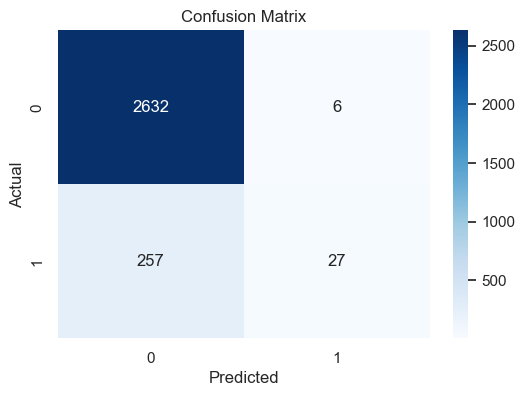

In [166]:
# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [168]:
# Classification Report
print("\nClassification Report:\n")
print(classification_report(Y_test, Y_pred))


Classification Report:

              precision    recall  f1-score   support

       False       0.91      1.00      0.95      2638
        True       0.82      0.10      0.17       284

    accuracy                           0.91      2922
   macro avg       0.86      0.55      0.56      2922
weighted avg       0.90      0.91      0.88      2922



### Step 10.6: ROC Curve

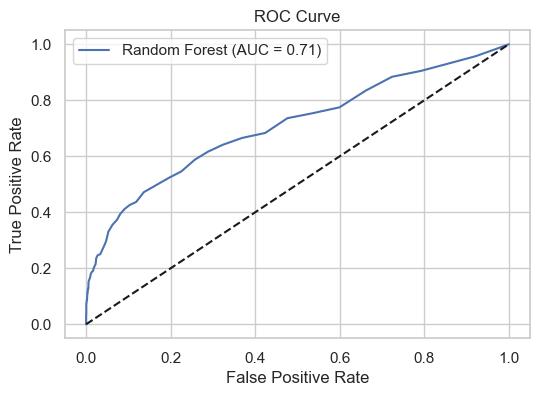

In [171]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(Y_test, Y_proba)))
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

### Step 10.7: Feature Importance

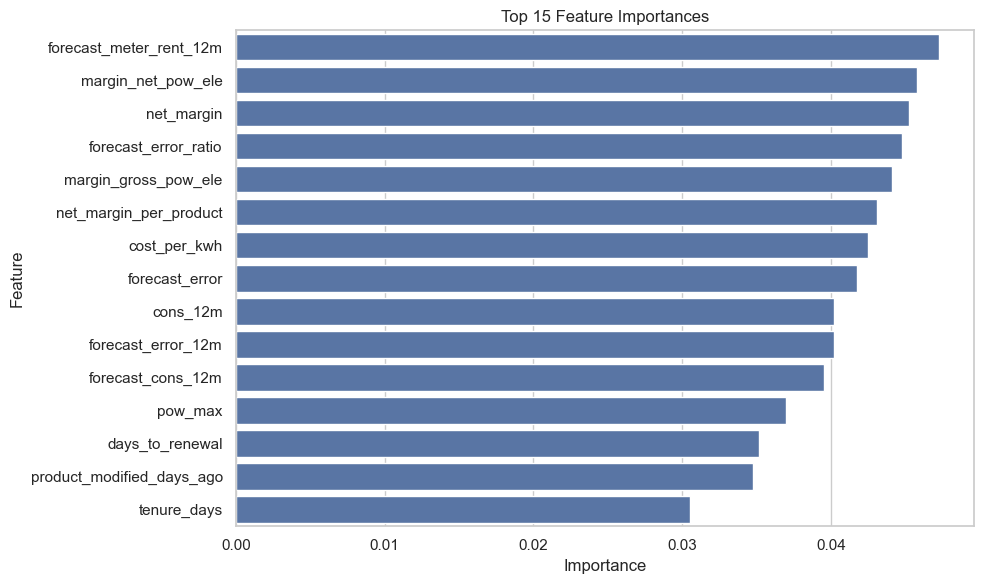

In [178]:
importances = rf_model.feature_importances_
feat_names = X.columns
feat_importance_df = pd.DataFrame({
    'Feature': feat_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_importance_df.head(15), x='Importance', y='Feature')
plt.title('Top 15 Feature Importances')
plt.tight_layout()
plt.show()